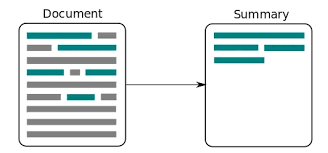

# Steps:



1.   Importing Hugging Face library
2.   Using / build Pipeline to call LLM
3.   Summarize text







In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
summarizer_model = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [ ]:
text = """
Muhammad Ali Jinnah[a] (born Mahomedali Jinnahbhai;[b] 25 December 1876 – 11 September 1948) was a barrister, politician, and the founder of Pakistan. Jinnah served as the leader of the All-India Muslim League from 1913 until the inception of Pakistan on 14 August 1947 and then as Pakistan's first governor-general until his death.

Born at Wazir Mansion in Karachi, Jinnah was trained as a barrister at Lincoln's Inn in London, England. Upon his return to India, he enrolled at the Bombay High Court, and took an interest in national politics, which eventually replaced his legal practice. Jinnah rose to prominence in the Indian National Congress in the first two decades of the 20th century. In these early years of his political career, Jinnah advocated Hindu–Muslim unity, helping to shape the 1916 Lucknow Pact between the Congress and the All-India Muslim League, in which Jinnah had also become prominent. Jinnah became a key leader in the All-India Home Rule League, and proposed a fourteen-point constitutional reform plan to safeguard the political rights of Muslims in the Indian subcontinent. In 1920, however, Jinnah resigned from the Congress when it agreed to follow a campaign of satyagraha, which he regarded as political anarchy.

By 1940, Jinnah had come to believe that the Muslims of the subcontinent should have their own state to avoid the possible marginalised status they might be reduced to in an independent Hindu–Muslim state. In that year, the Muslim League, led by Jinnah, passed the Lahore Resolution, demanding a separate nation for Indian Muslims. During the Second World War, the League gained strength while leaders of the Congress were imprisoned, and in the provincial elections held shortly after the war, it won most of the seats reserved for Muslims. Ultimately, the Congress and the Muslim League could not reach a power-sharing formula that would allow the entirety of British India to be united as a single state following independence, leading all parties to agree instead to the independence of a Hindu-majority India, and for a predominantly Muslim state of Pakistan.
"""

In [ ]:
text

"\nMuhammad Ali Jinnah[a] (born Mahomedali Jinnahbhai;[b] 25 December 1876 – 11 September 1948) was a barrister, politician, and the founder of Pakistan. Jinnah served as the leader of the All-India Muslim League from 1913 until the inception of Pakistan on 14 August 1947 and then as Pakistan's first governor-general until his death.\n\nBorn at Wazir Mansion in Karachi, Jinnah was trained as a barrister at Lincoln's Inn in London, England. Upon his return to India, he enrolled at the Bombay High Court, and took an interest in national politics, which eventually replaced his legal practice. Jinnah rose to prominence in the Indian National Congress in the first two decades of the 20th century. In these early years of his political career, Jinnah advocated Hindu–Muslim unity, helping to shape the 1916 Lucknow Pact between the Congress and the All-India Muslim League, in which Jinnah had also become prominent. Jinnah became a key leader in the All-India Home Rule League, and proposed a fou

In [ ]:
summarized_text = summarizer_model(text, max_length = 130, min_length = 30, do_sample = False)

In [ ]:
summarized_text

[{'summary_text': ' Muhammad Ali Jinnah was a barrister, politician, and the founder of Pakistan . He served as the leader of the All-India Muslim League from 1913 until the inception of Pakistan in 1947 . Jinnah rose to prominence in the Indian National Congress in the first two decades of the 20th century .'}]

In [ ]:
summarized_text1 = summarizer_model(text, max_length = 130, min_length = 30,do_sample=True)

In [ ]:
summarized_text1

[{'summary_text': ' Jinnah was a barrister, politician, and the founder of Pakistan . He served as the leader of the All-India Muslim League from 1913 until the inception of Pakistan on 14 August 1947 . Jinnah rose to prominence in the Indian National Congress in the early 20th century .'}]

In [ ]:
len(text.split())

339

In [ ]:
len(summarized_text[0]['summary_text'].split())

52

In [ ]:
# call pipeline with model name
summarizer_model1 = pipeline("summarization", model = 'facebook/bart-large-cnn')

Device set to use cuda:0


In [ ]:
summarized_text = summarizer_model1(text, max_length = 130, min_length = 30, do_sample = False)

In [ ]:
summarized_text

[{'summary_text': 'Muhammad Ali Jinnah (25 December 1876 – 11 September 1948) was a barrister, politician, and the founder of Pakistan. Jinnah rose to prominence in the Indian National Congress in the first two decades of the 20th century. He served as the leader of the All-India Muslim League from 1913 until the inception of Pakistan on 14 August 1947.'}]

# Text Summarization using a PDF file

### need to read the text content from the PDF file first and then pass that text to the summarizer model.

### Steps



1.   Install necessary libraries: transformers for summarization, PyPDF2 for reading PDF files, and optionally reportlab for creating a sample PDF.
2.   Read the text from the PDF file.
3.   Summarize the extracted text.






In [ ]:
# Install necessary libraries
!pip install transformers
from transformers import pipeline
!pip install PyPDF2
!pip install --upgrade PyPDF2
from PyPDF2 import PdfReader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 14.1 MB/s eta 0:00:00


In [ ]:
# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    pdf_text = ""   # An empty string pdf_text is initialized to store the extracted text from the PDF.
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)  # Create a PdfReader Object
        for page in reader.pages:
            pdf_text += page.extract_text()
    return pdf_text

# Path to the PDF file
pdf_path = "/content/M Raza CV 2.pdf"
# pdf_path = "your_pdf_file.pdf"

# Extract text from the PDF
text = extract_text_from_pdf(pdf_path)


In [ ]:
text

'MuhammadAsadRaza\nMK64AU,MiltonKeynes|asadravjani786@gmail.com|+447869694166\nProfessionalSummary\nFirst-ClassHonorsdegreeinComputerSciencewithafocusonAI&Robotics.Proficientindataanalysis,dataextraction,andintegrationusingPowerBI,Excel,SQL,andTableau.Strongcommunicatorwithexperienceindevelopingdata-drivensolutionsandvisualizations.Skilledinautomatingdataupdatesandensuringdataqualitythroughvalidationprocesses.Eagertocontributetoadynamicdatateaminaglobalenvironmentandleveragemytechnicalskillsinadataanalyst/dataengineerrole.\nWorkExperience\nFraudAnalyst|GlobalPaymentsUK22April24–Current\n●Excelledindeliveringexceptionalcustomerservicewith100%customersatisfactionbythoroughlyunderstandingcustomerissues\n●Maintainedextensivedatasets,ensuringdataintegrityforfrauddetectionandanalysis.\n●Utilizedstatisticaltechniquestouncoverpatternsandtrendsincomplexdatasets.\n●Usageofpredictivemodelstoforecasttrends,aidingdecision-makingprocesses.\n●Appliedproblem-solvingskillstoderiveactionableinsightssupp

pdf_text = ""   # An empty string pdf_text is initialized to store the extracted text from the PDF.

PdfReader(file) --> A PdfReader object is created by passing the file object (file). The PdfReader class from the PyPDF2 library is used to read the content of the PDF file.


for page in reader.pages -->
This line starts a loop that iterates through each page in the PDF. The reader.pages attribute is a list of pages in the PDF.pdf_text = ""   # An empty string pdf_text is initialized to store the extracted text from the PDF.



For each page, the extract_text method is called to extract the text content from the page. The extracted text is then concatenated to the pdf_text string.


## Summary:
The extract_text_from_pdf function reads a PDF file from the specified path, extracts text from each page, and returns the combined text. It:

1. Opens the PDF file in binary read mode.

2. Creates a PdfReader object to read the PDF.

3. Iterates through each page in the PDF.

4. Extracts text from each page using the extract_text method.

5. Concatenates the extracted text to a single string.

6. Returns the concatenated text.


In [ ]:
# Initialize the summarization pipeline
summarizer_model = pipeline("summarization",model = 'facebook/bart-large-cnn')
# Summarize the extracted text
summarized_text = summarizer_model(text, max_length=130, min_length=30, do_sample=False)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Print the summarized text
print(summarized_text[0]['summary_text'])

FraudAnalyst MuhammadAsadRaza holds a First-ClassHonors degree inComputerScience. He is proficient in data analysis, dataextraction, andintegration using PowerBI,Excel,SQL, andTableau. He has also developed a hotel management system.


In [ ]:
len(text.split())

41

In [ ]:
len(summarized_text[0]['summary_text'].split())

21